# Audio with Python - advanced

## Contents
1. Resampy - change the sample rate
2. Plotting a spectrogram with matplotlib
3. SciPy Wavfile
4. Librosa
6. pyloudnorm

## 1. Resampy - change the sample rate

In [1]:
#only used for demonstration perposes
%pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#plot the waveform
import librosa
import resampy

# Load the trumpet audio file from librosa's examples
try:
    x, sr_orig = librosa.load(librosa.ex('trumpet'), sr=None)
except:
    import librosa
    librosa.util.example_data.download()
    x, sr_orig = librosa.load(librosa.ex('trumpet'), sr=None)

# x is now a 1-d numpy array, with `sr_orig` audio samples per second

# We can resample this to any sampling rate we like, say 16000 Hz
y_low = resampy.resample(x, sr_orig, 16000)

# That's it!ith `sr_orig` audio samples per second

# We can resample this to any sampling rate we like, say 16000 Hz
y_low = resampy.resample(x, sr_orig, 16000)

# That's it!

In [11]:
#inspect the data
print(type(x))
print(type(y_low))

print(x)
print(y_low)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
[-9.0889534e-04 -6.5751863e-04  1.1082261e-04 ... -3.9816146e-06
 -9.8387054e-06 -7.0730111e-06]


## 2. Plotting a spectogram with matplotlib

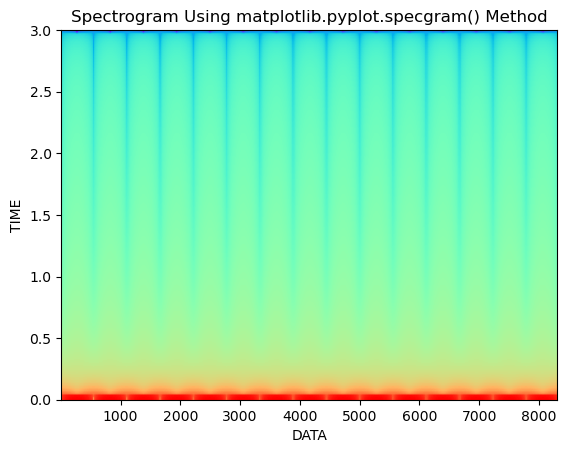

In [13]:
%matplotlib inline
# Importing libraries using import keyword.
import math
import numpy as np
import matplotlib.pyplot as plt

# Set the time difference to take picture of
# the the generated signal.
Time_difference = 0.0001

# Generating an array of values
Time_Array = np.linspace(0, 5, math.ceil(5 / Time_difference))

# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))

# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(Data, Fs=6, cmap="rainbow")

# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.show()


## 3. Scipy wavfile

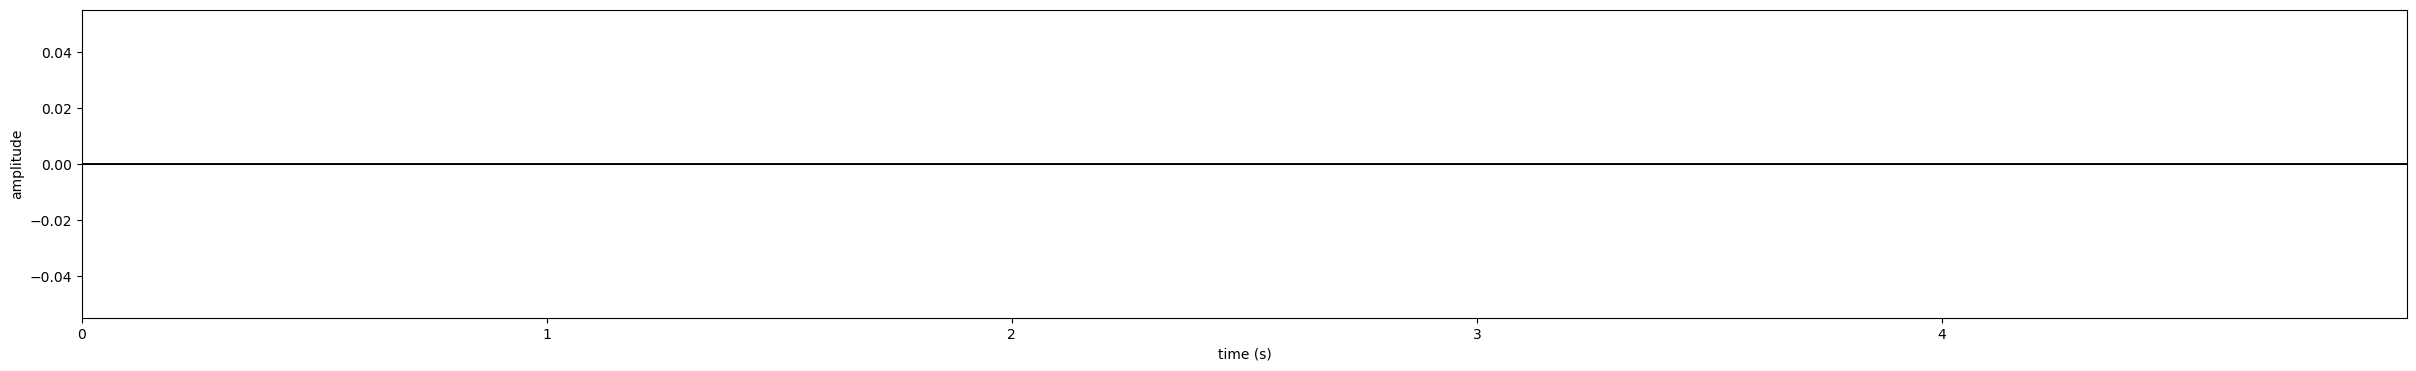

In [14]:
%matplotlib inline
#source:https://gist.github.com/leouieda/9043213 #NOT WORKING
# Load the required libraries:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('tone_220.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[0], color='k') # data[:,1],
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
plt.show()

### 4b. SciPy for out.wav

In [22]:
from scipy.io import wavfile
samplerate, data = wavfile.read('tone_220.wav') #test2 and test3
print(samplerate)
#print(data.shape)
print(data.shape[0])

22050
110250


In [24]:
length = data.shape[0] / samplerate
print(type(data))
print(f"length = {length}s")


<class 'numpy.ndarray'>
length = 5.0s


In [26]:
import wave
import struct

wavefile = wave.open('tone_220.wav', 'r')

length = wavefile.getnframes()
for i in range(0, length):
    wavedata = wavefile.readframes(1)
    data = struct.unpack("<h", wavedata)
    print(int(data[0]))

0
1026
2048
3063
4065
5051
6018
6961
7876
8761
9611
10423
11195
11922
12603
13234
13813
14338
14806
15217
15567
15857
16084
16247
16348
16383
16355
16262
16105
15885
15603
15259
14856
14394
13875
13302
12677
12002
11280
10513
9705
8859
7978
7066
6126
5162
4178
3177
2164
1142
116
-910
-1933
-2949
-3953
-4941
-5910
-6856
-7775
-8663
-9517
-10334
-11110
-11843
-12529
-13166
-13751
-14282
-14757
-15174
-15531
-15828
-16062
-16233
-16340
-16384
-16362
-16277
-16127
-15915
-15639
-15303
-14906
-14450
-13938
-13371
-12752
-12082
-11365
-10603
-9800
-8958
-8081
-7172
-6235
-5274
-4292
-3293
-2281
-1260
-234
793
1817
2833
3838
4829
5800
6749
7671
8563
9421
10242
11023
11761
12452
13095
13686
14223
14705
15129
15493
15796
16038
16216
16330
16381
16367
16289
16147
15941
15673
15343
14953
14504
13998
13437
12824
12160
11448
10691
9892
9055
8181
7276
6342
5383
4403
3406
2395
1375
350
-677
-1701
-2719
-3726
-4718
-5692
-6643
-7568
-8464
-9326
-10152
-10937
-11680
-12377
-13025
-13622
-14166
-14654
-

In [27]:
length

110250

### 4c. Scipy .io write

source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

In [ ]:
# Create a 100Hz sine wave, sampled at 44100Hz. Write to 16-bit PCM, Mono.
import numpy as np
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

In [ ]:
from IPython import display
display.Audio('example.wav')

### 4d. Spectogram with SciPy

In [ ]:
import glob
wav_files = glob.glob('*.wav')
print(wav_files)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'example.wav', 'loudness.wav', 'my_test.wav', 'my_wav.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'silence.wav', 'test.wav', 'test2.wav', 'test3.wav']


<ipython-input-71-f7bdbadebf33>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


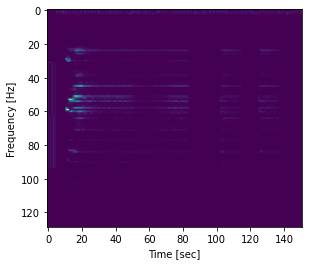

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('claxon_close.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 4. Librosa
- source: https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
- source: https://librosa.org/doc/latest/index.html

In [36]:
import librosa
librosa.__version__

'0.10.2.post1'

In [28]:
from glob import glob
files = glob('*.wav')
print(files)

['tone_220.wav', 'example.wav', 'tone_440.wav']


In [29]:
audio_data=files[1]
audio_data

'example.wav'

In [30]:
from IPython import display
print(audio_data)
display.Audio(audio_data)

example.wav


In [31]:
import librosa
#path = librosa.ex('oe_wavs/record_1630521181')
librosa.get_samplerate(audio_data)

44100

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [34]:
import librosa
audio_data = files[1]
x , sr = librosa.load(audio_data) #sr = sampling rate
print(type(x), type(sr))
print(sr)

<class 'numpy.ndarray'> <class 'int'>
22050


In [35]:
#creating a waveplot
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

AttributeError: module 'librosa.display' has no attribute 'waveplot'

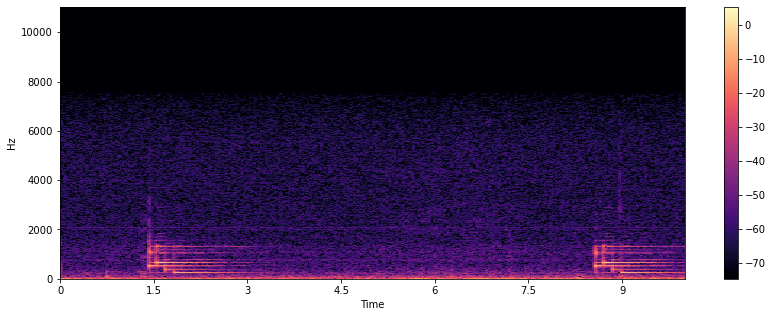

In [ ]:
#creating a spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
from IPython.display import Audio
Audio('tone_220.wav')

## 5. Pyloudnorm

http://en.wikipedia.org/wiki/Loudness

In [37]:
!pip install pyloudnorm

In [38]:
# Create a 100Hz sine wave, sampled at 44100Hz. Write to 16-bit PCM, Mono.
import numpy as np
from scipy.io.wavfile import write
samplerate = 44100; fs = 1000
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

In [39]:
from IPython import display
display.Audio('example.wav')

In [40]:
import glob
my_wavs = glob.glob('*.wav')
print(my_wavs)

['tone_220.wav', 'example.wav', 'tone_440.wav']


In [41]:
# source: https://reposhub.com/python/miscellaneous/csteinmetz1-pyloudnorm.html
import soundfile as sf
import pyloudnorm as pyln

for i in range (len(my_wavs)):
    data, rate = sf.read(my_wavs[i]) # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness = meter.integrated_loudness(data) # measure loudness
    print(my_wavs[i], loudness)

tone_220.wav -9.9754431437814
example.wav -3.0462351245816865
tone_440.wav -9.757551445949655


### 5b. Recording wav and analysing with pyloudnorm

In [42]:
from datetime import datetime
import sounddevice as sd
from scipy.io.wavfile import write
import soundfile as sf
import pyloudnorm as pyln

#settings
fs = 16000  # Sample rate
seconds = 1 # Duration of recording
now=datetime.now()
#creating a file
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('loudness.wav', fs, myrecording)  # Save as WAV file 
#calculate loudness
data, rate = sf.read('loudness.wav') # load audio (with shape (samples, channels))
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data) # measure loudness
print(now, loudness)

PortAudioError: Error opening InputStream: Invalid number of channels [PaErrorCode -9998]

In [43]:
for i in range(0,10):
    now=datetime.now()
    #creating a file
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write('loudness.wav', fs, myrecording)  # Save as WAV file 
    #calculate loudness
    data, rate = sf.read('loudness.wav') # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness = meter.integrated_loudness(data) # measure loudness
    print(now, loudness)

PortAudioError: Error opening InputStream: Invalid number of channels [PaErrorCode -9998]